In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
painting = pd.read_csv('../../data/painting.csv')
painting.head()

,file,title,artist,genre,style
0,Realism/vincent-van-gogh_pine-trees-in-the-fen...,pine-trees-in-the-fen-1884,vincent-van-gogh,landscape,Realism
1,Baroque/rembrandt_the-angel-appearing-to-the-s...,the-angel-appearing-to-the-shepherds-1634,rembrandt,religious painting,Baroque
2,Post_Impressionism/paul-cezanne_portrait-of-th...,portrait-of-the-artist-s-son,paul-cezanne,portrait,Post_Impressionism
3,Impressionism/pierre-auguste-renoir_young-girl...,young-girl-seated-in-a-meadow-1916,pierre-auguste-renoir,genre painting,Impressionism
4,Romanticism/ivan-aivazovsky_morning-1851.jpg,morning-1851,ivan-aivazovsky,marina,Romanticism


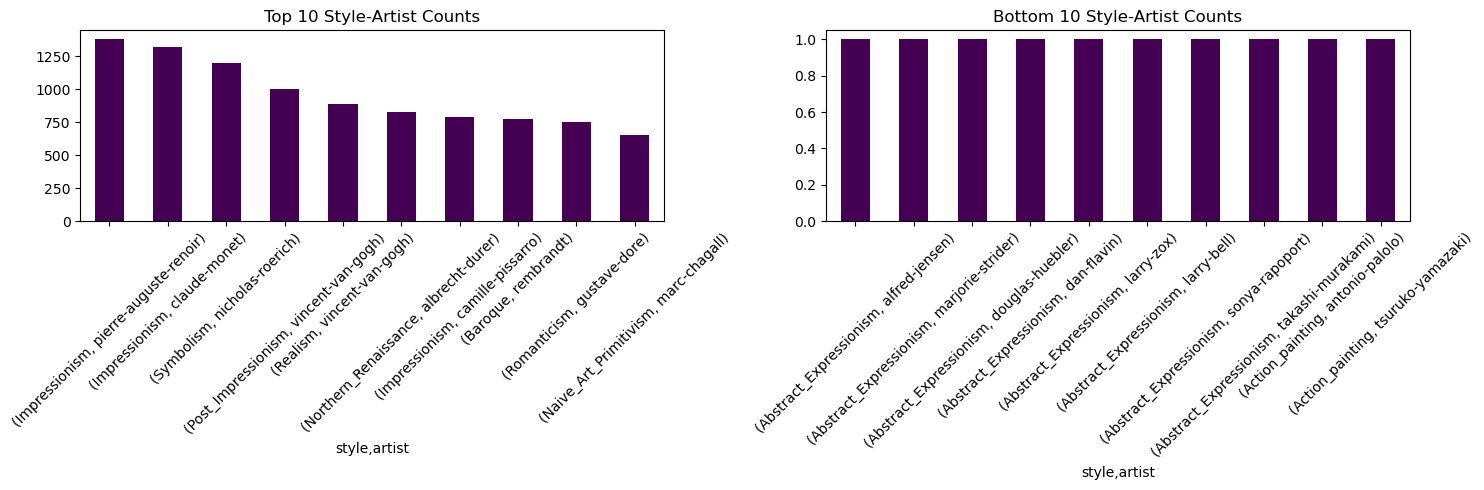

In [62]:
# 데이터 준비
style_artist_vc = painting.groupby('style')[['artist']].value_counts()
top_10_style_artist_vc = style_artist_vc.nlargest(10)
bottom_10_style_artist_vc = style_artist_vc.nsmallest(10)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 상위 10개 시각화
top_10_style_artist_vc.plot(kind='bar', rot=45, colormap='viridis', ax=axes[0])
axes[0].set_title('Top 10 Style-Artist Counts')

# 하위 10개 시각화
bottom_10_style_artist_vc.plot(kind='bar', rot=45, colormap='viridis', ax=axes[1])
axes[1].set_title('Bottom 10 Style-Artist Counts')

# 레이아웃 자동 조정
plt.tight_layout()
plt.show()


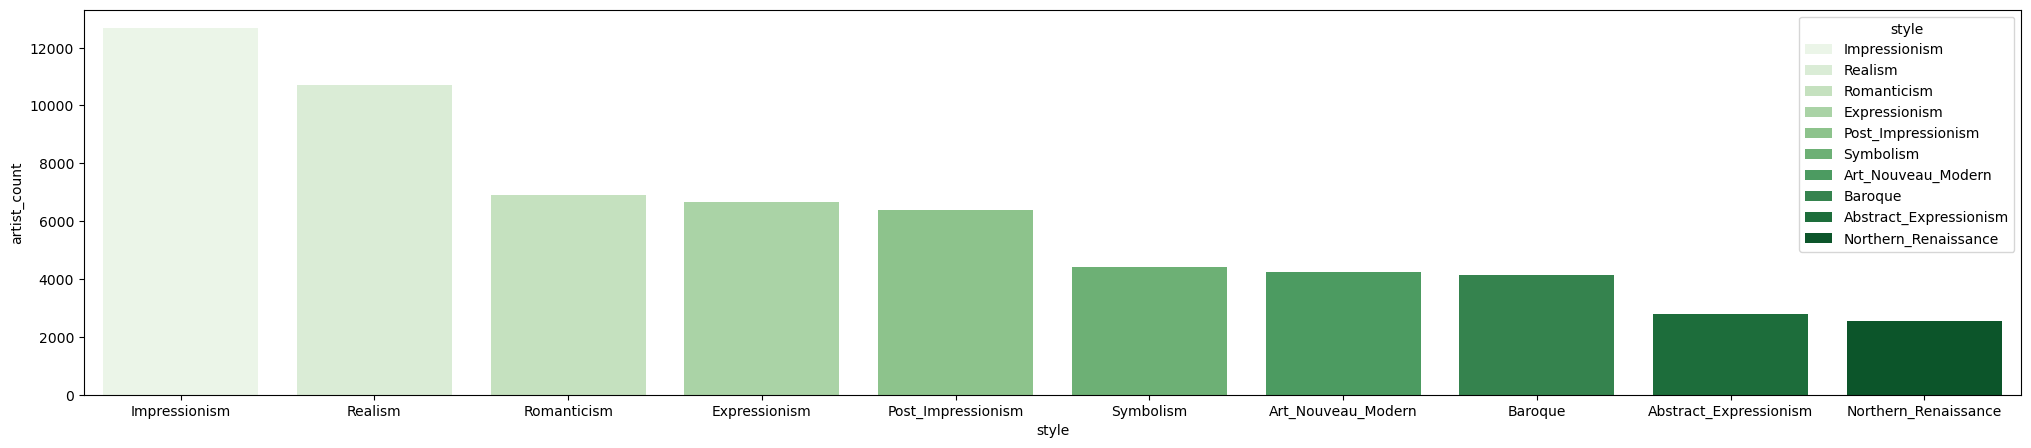

In [116]:
# 스타일별 아티스트 수를 계산
style_artist_counts = painting.groupby('style')['artist'].count().reset_index(name='artist_count')

# artist_count를 기준으로 상위 10개 시각화
top_10_style_artist_vc = style_artist_counts.nlargest(10, 'artist_count')

# 시각화
plt.figure(figsize=(25, 5))
sns.barplot(data=top_10_style_artist_vc, x='style', y='artist_count', hue='style', dodge=False, palette='Greens')
plt.show()

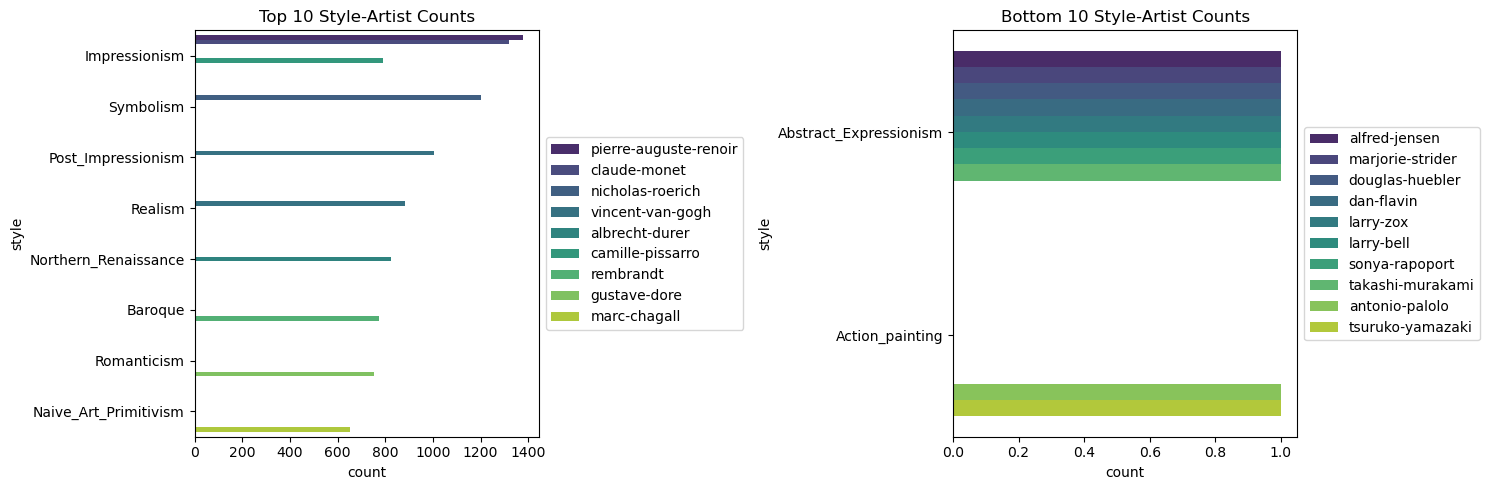

In [93]:
# 데이터 준비
style_artist_vc = painting.groupby('style')[['artist']].value_counts()
top_10_style_artist_vc = style_artist_vc.nlargest(10).reset_index(name='count')
bottom_10_style_artist_vc = style_artist_vc.nsmallest(10).reset_index(name='count')

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 상위 10개 시각화 (legend 숨기기)
sns.barplot(x='count', y='style', hue='artist', data=top_10_style_artist_vc, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Style-Artist Counts')

# 하위 10개 시각화 (legend 숨기기)
sns.barplot(x='count', y='style', hue='artist', data=bottom_10_style_artist_vc, ax=axes[1], palette='viridis')
axes[1].set_title('Bottom 10 Style-Artist Counts')

# 각 서브플롯의 legend를 오른쪽에 위치시키기
handles_0, labels_0 = axes[0].get_legend_handles_labels()
handles_1, labels_1 = axes[1].get_legend_handles_labels()

# 각 서브플롯의 legend를 오른쪽에 배치
axes[0].legend(handles_0, labels_0, loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].legend(handles_1, labels_1, loc='center left', bbox_to_anchor=(1, 0.5))

# 레이아웃 자동 조정
plt.tight_layout()
plt.show()

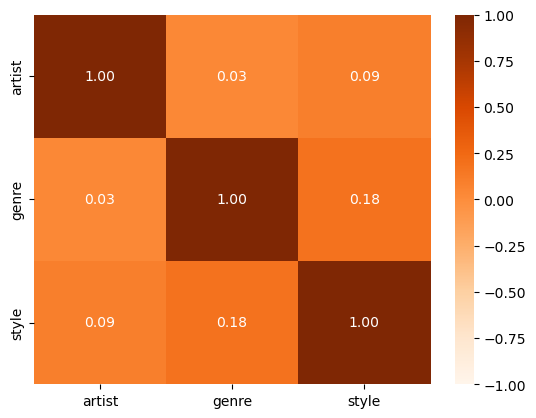

In [78]:
ags = painting.iloc[:, -3:]
le = LabelEncoder()
ags_labels = ags.apply(le.fit_transform)

sns.heatmap(ags_labels.corr(), vmin=-1, vmax=1, annot=True, cmap='Oranges', fmt='.2f')
plt.show()